# Project: Investigate a Dataset

## Selected dataset: No-show appointments

In [1]:
# Importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('./data/noshowappointments-kagglev2-may-2016.csv')
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.shape

(110527, 14)

The dataset includes **14** columns and **110527** data rows.

In the next cells, we will identify the data format and types (Quantitative vs. Categorical) of each column to help us plan and determine the best data analysis strategy to approach this dataset. In order to do that; at first, we will plot the dataframe data using seaborn **pariplot()** function to gain a preliminary understanding for the data types; next, we will identify the data type of each column individually using Pandas **unique()** function to confirm the data type and decide on the type of analysis we will conduct.

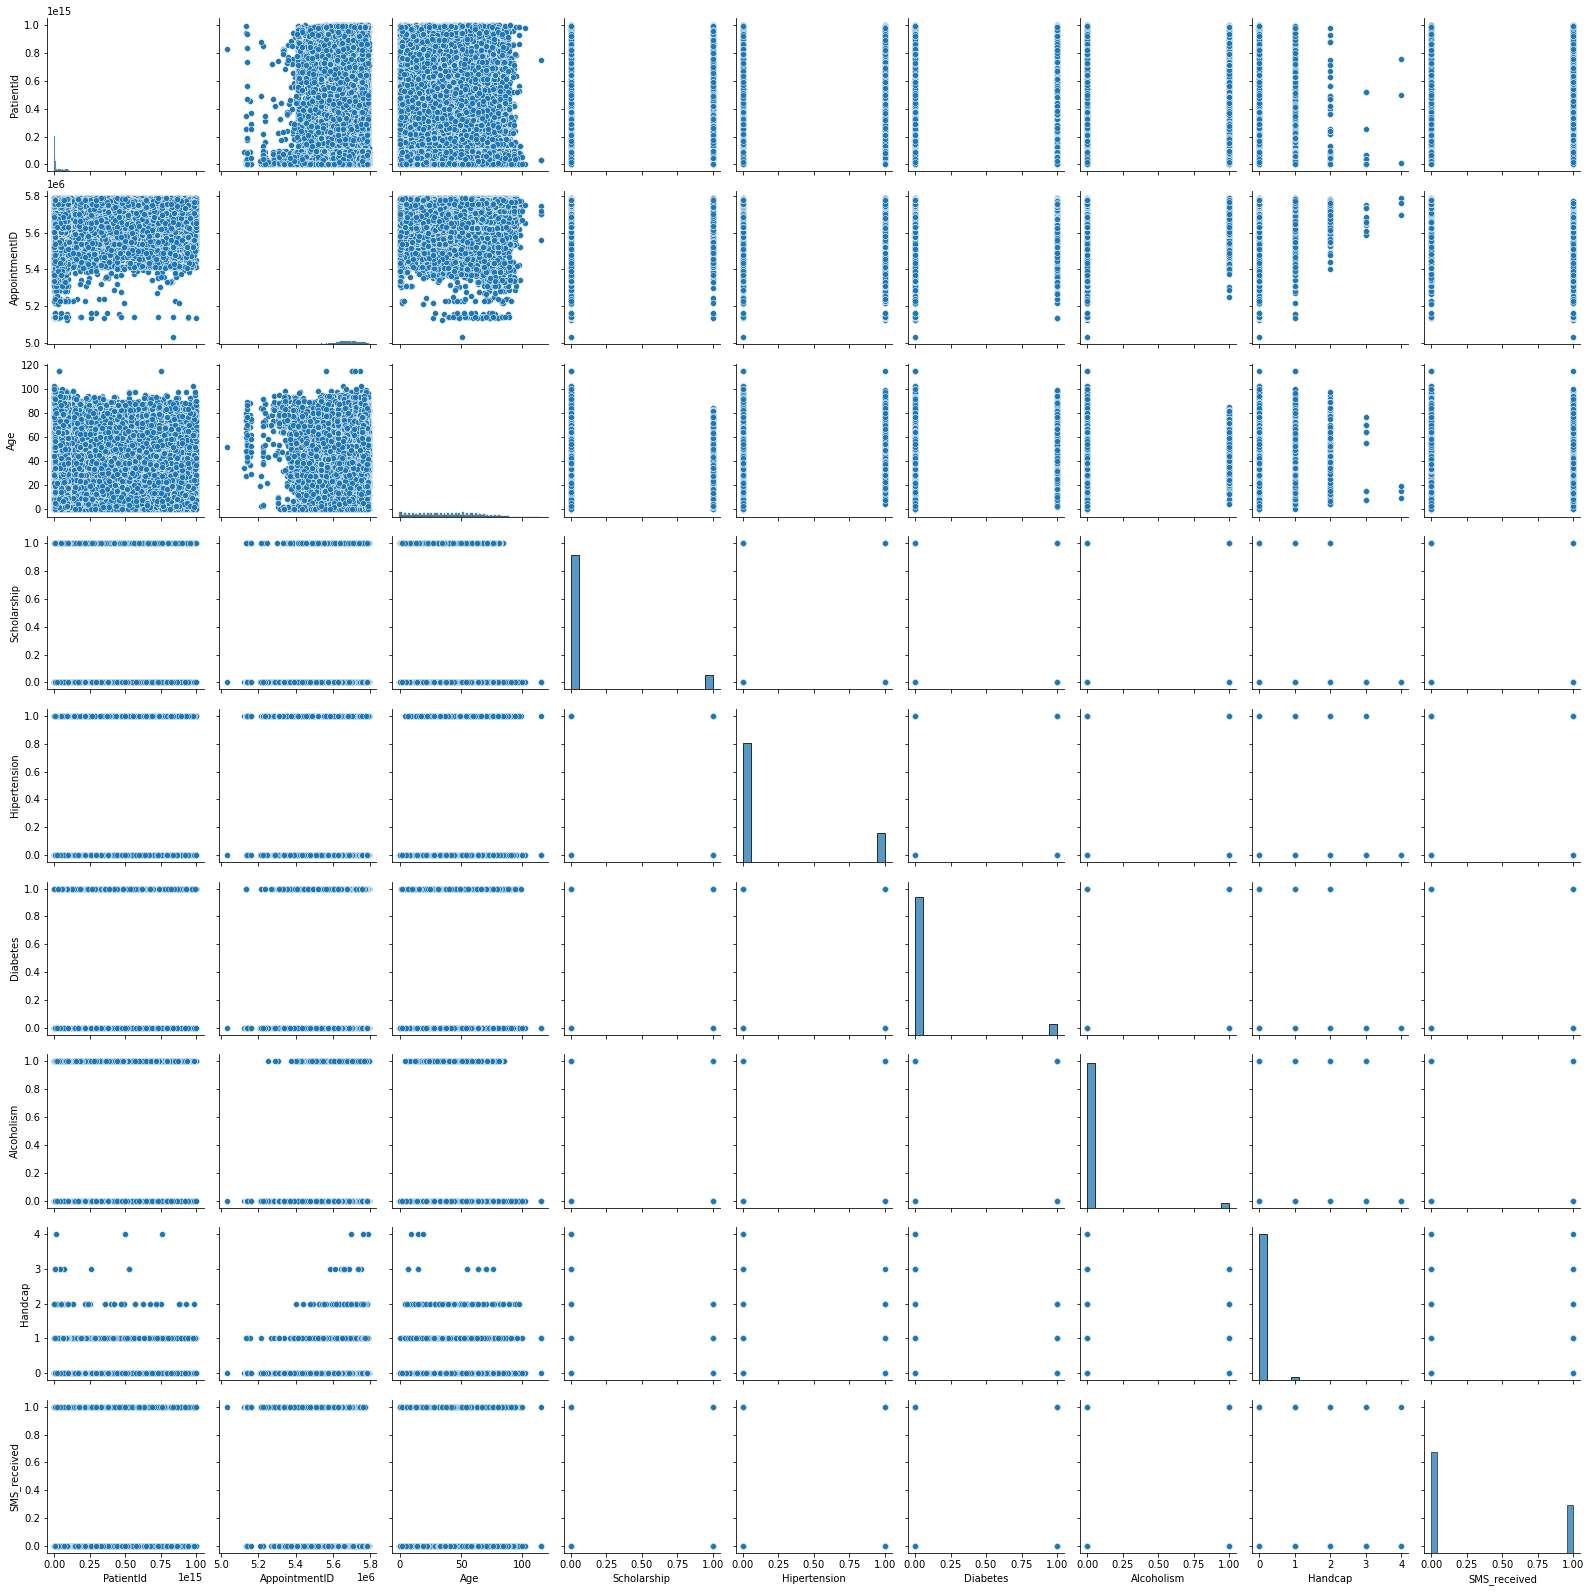

In [5]:
sns.pairplot(df);

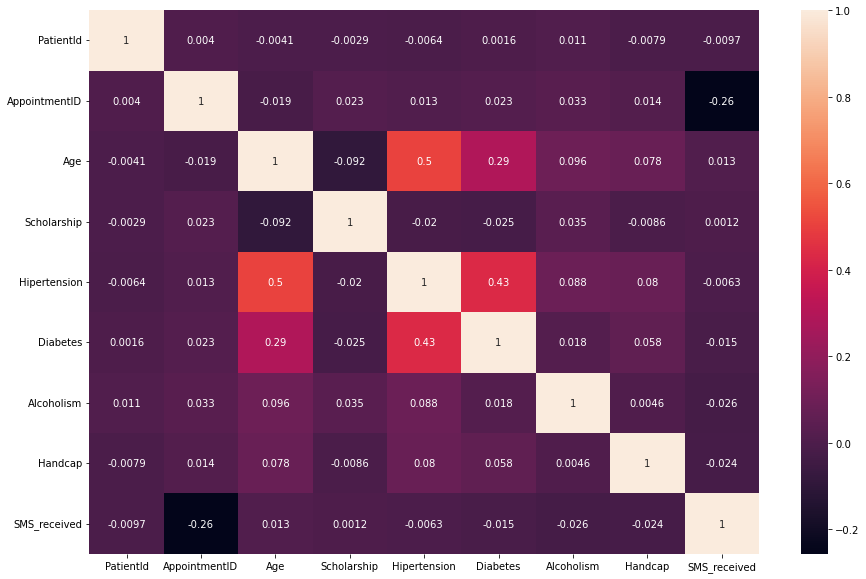

In [6]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), ax=ax, annot=True);

Looking at the heatmap above, it seems like there is some degree of corrolation between Age and Hypertension, and to a less extent, between Hypertension and Diabetes. In the next sections, we will perform more indepth analysis to confirm our preliminary findings.

Looking at the charts above, we notice the data frame includes the two types of data:

1. **Categorical Data:** Gender, Diabetes, Alcoholism, Handcap, SMS_received, No-show
2. **Quantitative Data:** PatientId, AppointmentID, Age, ScheduledDay, AppointmentDay
In the next section, we will identify the exact types of each column and confirm the data analysis strategy for each column.

## 2. Missing/Duplicated/Incorrect Data Validation

### 2.1 Missing Values Validation

In [7]:
# Check if there is any missing value
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

### 2.2 Duplicated Values Validation

In [8]:
# Check for duplicate rows 
df.duplicated().sum()

0

In [9]:
# Check for duplicate appointmentID

sum(df.AppointmentID.duplicated())

0

The cell above shows no duplicates in the **AppointmentID** column.

In [10]:
sum(df.PatientId.duplicated())

48228

In [11]:
df.PatientId.value_counts().head(10)

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
6.264199e+12    62
2.584244e+11    62
8.713749e+14    62
7.579746e+13    62
6.684488e+13    57
8.722785e+11    55
Name: PatientId, dtype: int64

Looking at the cells above, we note that the PatientId column contains repeated values which means same patients booked more than an appointment; looking at the output of the value_counts() function, we note the top 5 patients that booked the biggest number of appointments.

With that, our analysis will mainly rely on the appointment count,rather than patients count; however, we will reference the number of patients, where applicable, to help identify any corrolation between specific patterns and the diversity of the studied group(s).

### 2.3 Incorrect Data Validation (Depending on the nature of each column)

In [12]:
# Check for zero/negative AppointmentID

df[df.AppointmentID < 0]['AppointmentID']

Series([], Name: AppointmentID, dtype: int64)

In [13]:
# Check for zero/negative PatientsId values

df[df.PatientId <= 0]['PatientId']

Series([], Name: PatientId, dtype: float64)

In [14]:
df.Gender.unique()

array(['F', 'M'], dtype=object)

In [15]:
df.ScheduledDay.unique()

array(['2016-04-29T18:38:08Z', '2016-04-29T16:08:27Z',
       '2016-04-29T16:19:04Z', ..., '2016-04-27T16:03:52Z',
       '2016-04-27T15:09:23Z', '2016-04-27T13:30:56Z'], dtype=object)

In [16]:
df.AppointmentDay.unique()

array(['2016-04-29T00:00:00Z', '2016-05-03T00:00:00Z',
       '2016-05-10T00:00:00Z', '2016-05-17T00:00:00Z',
       '2016-05-24T00:00:00Z', '2016-05-31T00:00:00Z',
       '2016-05-02T00:00:00Z', '2016-05-30T00:00:00Z',
       '2016-05-16T00:00:00Z', '2016-05-04T00:00:00Z',
       '2016-05-19T00:00:00Z', '2016-05-12T00:00:00Z',
       '2016-05-06T00:00:00Z', '2016-05-20T00:00:00Z',
       '2016-05-05T00:00:00Z', '2016-05-13T00:00:00Z',
       '2016-05-09T00:00:00Z', '2016-05-25T00:00:00Z',
       '2016-05-11T00:00:00Z', '2016-05-18T00:00:00Z',
       '2016-05-14T00:00:00Z', '2016-06-02T00:00:00Z',
       '2016-06-03T00:00:00Z', '2016-06-06T00:00:00Z',
       '2016-06-07T00:00:00Z', '2016-06-01T00:00:00Z',
       '2016-06-08T00:00:00Z'], dtype=object)

Looking at the **AppointmentDay** column values above, the time portion is set to zero, therefore, the time aspect of the appointment is not going to be included in this analysis.

In [17]:
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

Looking at the **Age values**, we notice that there is one record with negative value (-1); per review of the dataset documentation on www.Kaggle.com, there is no confirmation why (-1) was assigned in the 'Age' column; some suggested that the negative value could be assigned where the patient is a fetus that has not been born yet; others suggested that this might be a mistake; for the time being, we are going to temporarily exclude this record from our analysis until an explanation is provided.

In [18]:
# Check if the Age column has negative values; 
# we will accept patients with 0 age assuming they represent newborns less than one year old

df[df.Age < 0]['Age']

99832   -1
Name: Age, dtype: int64

In [19]:
df.Neighbourhood.unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [20]:
df.Neighbourhood.nunique()

81

In [21]:
df.Alcoholism.unique()

array([0, 1])

In [22]:
df.Diabetes.unique()

array([0, 1])

In [23]:
df.Handcap.unique()

array([0, 1, 2, 3, 4])

Looking at the values in the **Handcap** column, we see 5 values (0,1,2,3,4)

In [24]:
df.Hipertension.unique()

array([1, 0])

In [25]:
df.Scholarship.unique()

array([0, 1])

In [26]:
df.SMS_received.unique()

array([0, 1])

In [27]:
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

**Summary:** In the section above, we explored each column individually to confirm the existence of any data errors, so they can be fix/eliminate them in the next step; we also identified the data types and determined how we are going to use each column in our analysis, please see the summary below:

- **PatientId:** (Quantitative - Discrete): as mentioned above, a number of patients have more than one appointment; this column will be used in the analysis as applicable.
- **AppointmentID:** Quantitative - Discrete (unique values): will be considered the primary key in our dataset;
- **Gender:** (Categorical - Nominal)
- **ScheduledDay:** (Quantitative - Continuous): we will use the date section only to calculate the waiting duration between the appointment booking date and the appointment date.
- **AppointmentDay:** (Quantitative - Continuous): we will use the date section only to calculate the waiting duration between the appointment booking date and the appointment date and to create a new column (DayOfWeek).
- **Age:** (Quantitative - Continuous): we will use this column to create age groups.
- **Neighborhood:** (Categorical - Nominal) will limit our analyasis to top 20 neighbourhoods that have the highest numbers of appointments.
- **Scholarship:** (Categorical - Nominal): we will use this column to categorize our results as applicable.
- **Hipertension:** (Categorical - Nominal): we will use this column to categorize our results as applicable.
- **Diabetes:** (Categorical - Nominal): we will use this column to categorize our results as applicable.
- **Alcoholism:** (Categorical - Nominal): we will use this column to categorize our results as applicable.
- **Handcap:** (Categorical - Ordinal): we will use this column to categorize our results as applicable.
- **SMS_received:** (Categorical - Nominal): we will use this column to categorize our results as applicable.
- **Show-up:** (Categorical - Nominal): we will use this column to categorize our results as applicable.

Note: In order to present our data in an informative way, we will create data ranges for specific variables (Age & Waiting duration); elect data groups with the highest frequencies within certain variables (Neighbourhoods) and define functions to help us organize, summarize, and plot our data.

## 3. Data cleaning

In [28]:
# Rename Columns

df.columns = ['PatientID', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'Status']

In [29]:
# Convert PatientID to integer 

df['PatientID'] = df['PatientID'].astype('int64')

In [30]:
# Convert AppointmentDay and ScheduledDay from String to DateTime format, and 
# create 2 columns for: appointment booking date and the appointment date. 
# Note: Since the Appointment times were set to 00:00:00 in all the appointments, 
# our analysis won't include the appointment time.

# Appointment Date
df['AppointmentDate'] = pd.to_datetime(df['AppointmentDay']).dt.date
df['DayofWeek'] = pd.to_datetime(df['AppointmentDay']).dt.day_name()
df.drop('AppointmentDay',axis=1, inplace = True)
# Appointment Booking Date
df['ScheduledDate'] = pd.to_datetime(df['ScheduledDay']).dt.date
df.drop('ScheduledDay',axis=1, inplace = True)

In [31]:
# Create a new column to show the Waiting Duration (in days) between the scheduling date and appointment date 
df['WaitingDuration'] = df.AppointmentDate - df.ScheduledDate

In [32]:
df[df['WaitingDuration'] < '0 days']

,PatientID,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Status,AppointmentDate,DayofWeek,ScheduledDate,WaitingDuration
27033,7839272661752,5679978,M,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,2016-05-09,Monday,2016-05-10,-1 days
55226,7896293967868,5715660,F,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,2016-05-17,Tuesday,2016-05-18,-1 days
64175,24252258389979,5664962,F,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,2016-05-04,Wednesday,2016-05-05,-1 days
71533,998231581612122,5686628,F,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,2016-05-05,Thursday,2016-05-11,-6 days
72362,3787481966821,5655637,M,7,TABUAZEIRO,0,0,0,0,0,0,Yes,2016-05-03,Tuesday,2016-05-04,-1 days


Looking at the cells above, we notice there are 5 appointments where the appointment was booked (recorded) after the actual appointment; Also, we checked the NoShow column and noticed that none of the patients who booked these appointment did show up (NoShow = Yes); As the dataset documentation doesn't provide any explanation for these particuler appointments; therefore, **we will temporarily exclude them from our analysis**.

In [33]:
# Exclude the 5 records with the negative waiting duration, the new dataset size is 110527 - 5 = 110522

df = df[df['AppointmentDate'] >= df['ScheduledDate']]
df.shape

(110522, 16)

In [34]:
# Exclude the record with the negative Age value

df = df[df.Age != -1]
df.shape

(110521, 16)

In [35]:
# Update the values in the status, gender, scholarship, hypertension, diabetes, alcoholism, SMS_received columns
# to make them more user friendly

df['Status'] = df.Status.astype('category')
df.Status.cat.rename_categories(['Show','NoShow'], inplace = True)

df['Gender'] = df.Gender.astype('category')
df.Gender.cat.rename_categories(['Female','Male'], inplace = True)

df['Scholarship'] = df.Scholarship.astype('category')
df.Scholarship.cat.rename_categories(['No Scholarship','Scholarship'], inplace = True)

df['Hypertension'] = df.Hypertension.astype('category')
df.Hypertension.cat.rename_categories(['No Hypertension','Hypertension'], inplace = True)

df['Diabetes'] = df.Diabetes.astype('category')
df.Diabetes.cat.rename_categories(['No Diabetes','Diabetes'], inplace = True);

df['Alcoholism'] = df.Alcoholism.astype('category')
df.Alcoholism.cat.rename_categories(['No Alcoholism','Alcoholism'], inplace = True);

df['Handicap'] = df.Handicap.astype('category')
df.Handicap.cat.rename_categories(['No Handicap','Handicap L1','Handicap L2', 'Handicap L3', 'Handicap L4'], inplace = True);

df['SMS_received'] = df.SMS_received.astype('category')
df.SMS_received.cat.rename_categories(['No SMS_received','SMS_received'], inplace = True);

df['DayofWeek'] = df.DayofWeek.astype('category')
df.DayofWeek.cat.reorder_categories(['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday'], 
                                    ordered = True, inplace = True)

# Convert WaitingDuration column to integer for easier filteration 

df['WaitingDuration'] = (df.AppointmentDate - df.ScheduledDate).astype('timedelta64[D]').astype(int)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
/var/folders/_h/67ytyncn46l3vcwj8pgsbb0w0000gn/T/ipykernel_73911/4170416036.py:29: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  df.DayofWeek.cat.reorder_categories(['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday'],


In [36]:
# Define a new column to include the Age Groups

AgeGroupLabels = [ "{0} - {1}".format(i, i + 19) for i in range(0, 120, 20)]
df['AgeGroup'] = pd.cut(df.Age, range(0, 121, 20), right=False, labels=AgeGroupLabels)
df['AgeGroup'] = df.AgeGroup.astype('category')
df.AgeGroup.cat.categories

Index(['0 - 19', '20 - 39', '40 - 59', '60 - 79', '80 - 99', '100 - 119'], dtype='object')

The cell above shows 6 Age groups (in years) ranging from 0 - 119 with an internal of 20 years

In [37]:
# Define a new column to include the Waiting Duration Groups

WtngDurtnGroupLabels = [ "{0} - {1}".format(i, i + 29) for i in range(0, 180, 30)]
df['WaitingDurationGroups'] = pd.cut(df.WaitingDuration, range(0, 181, 30), right=False, labels=WtngDurtnGroupLabels)
df['WaitingDurationGroups'] = df.WaitingDurationGroups.astype('category')
df.WaitingDurationGroups.cat.categories

Index(['0 - 29', '30 - 59', '60 - 89', '90 - 119', '120 - 149', '150 - 179'], dtype='object')


The cell above shows 6 waiting duration groups (in days) ranging from 0 - 179 years with an internal of 30 days.

In [38]:
# Limit our dataset to appointments with NoShowUp status and use this 

NoShow_df = df[df['Status'] == 'NoShow']

Note: As we've seen before, the number of Neighbourhoods is quite large (81), therefore, we will limit our analysis to the **top 20** Neighbourhoods with the highest numbers of appointments.

In [39]:
# Create a new dataframe to limit patients to those who are based in one of the top 20 neibhourhoods 
# with the highest numbers of appointments.

## Step one: Create a list of the top 20 neibhourhoods with the highest numbers of appointments.

top_20_Nbrhd_list = list(df['Neighbourhood'].value_counts().nlargest(20).index)

## Step two: Create a new dataframe based on the list above

df_top_20_Nbrhd = df[df['Neighbourhood'].isin (top_20_Nbrhd_list)]

## Step three: apply filteration on the Status column to include the NoShow records only

df_top_20_Nbrhd_NoShow = df_top_20_Nbrhd[df_top_20_Nbrhd['Status']=='NoShow']

## Exploratory Data Analysis

### Questions
1. What is the overall appointment show-up vs. no show-up rate?
2. What are the proportions of the different categories within each variable and the show-up rates broken down by category?
3. Given the appointments where patients didn't show up, what is percentage of recurring patients vs. new patients? (the term recurring patients will be defined in the coming sections)
4. For each pair of variables, calculate the proportions of category combinations to identify the largest group of patients who didn't show-up. A step-by-step process will be provided to explain how this step will be performed. The purpose of this analysis is to serve as a starting point to identifying the factors that they may be contributing to the patients missing their appointments.

**Note:** This analysis is not meant to be providing a final conclusion on the reasons leading to patients missing their appointments as it doesn't involve using any inferential statistics techniques/machine learning algorithms; the scope of this project has been customized to meet specific objectives; and the project will be revisited as we progress in the course to utilize more advanced data analysis techniques/algorithms. Given the objectives of this project, We've limited our work in question 4 to 3 variables: Gender, Age, and SMS Received.

Before answering the Questions above, we will define a number of custom functions to help us conduct our analysis.

In [40]:
# Create a funtion to generate a bar plot the frequency table 
# generated by the Show_NoShow_by_Group function.

def Show_No_Show_bar_plot(df, bygroup):
    df_by_Group = pd.crosstab(df[bygroup], df.Status, normalize = 'index')
    df_by_Group = np.round((df_by_Group * 100), decimals=2)
    ax = df_by_Group.plot.bar(figsize=(10,5));
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);
    ax.set_xticklabels(df_by_Group.index,rotation = 0, fontsize = 15);
    ax.set_title('\nShowUp vs. No ShowUp (%) (by ' + df_by_Group.index.name + ')\n', fontsize = 15)
    ax.set_xlabel(df_by_Group.index.name, fontsize = 12)
    ax.set_ylabel('(%)', fontsize = 12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    rects = ax.patches

    # Add Data Labels

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 
                height + 2, 
                str(height)+'%', 
                ha='center', 
                va='bottom',
                fontsize = 12)
    return df_by_Group

In [41]:
# An updated version of Show_No_Show_bar_plot with different font formatting 
# to match the number of column categories 

def Show_No_Show_bar_plot_V2(df, bygroup):
    df_by_Group = pd.crosstab(df[bygroup], df.Status, normalize = 'index')
    df_by_Group = np.round((df_by_Group * 100), decimals=2)
    ax = df_by_Group.plot.bar(stacked = True, figsize=(20,10));
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);
    ax.set_xticklabels(df_by_Group.index,rotation = 45, fontsize = 12);
    ax.set_title('ShowUp vs. No ShowUp (%) (by ' + df_by_Group.index.name + ')\n', fontsize = 15)
    ax.set_xlabel(df_by_Group.index.name, fontsize = 12)
    ax.set_ylabel('(%)', fontsize = 12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    rects = ax.patches

    # Add Data Labels

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 
                height + 2,
                str(height)+'%',
                ha='center',
                va='bottom',
                fontsize = 12)
    return df_by_Group

In [42]:
# Create a funtion to calculate the plot the group proportions based on one variable by number of appointments

def PropByVar(df, variable):
    df_pie = df[variable].value_counts()
    ax = df_pie.plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 12);
    ax.set_title(variable + ' (%) (Per appointment)\n', fontsize = 15);
    return np.round(df_pie/df.shape[0]*100,2)

In [43]:
# Create a funtion to calculate the plot the group proportions based on one variable  

def NumOfPatients(df, variable):
    PatID_Count = pd.pivot_table(df, index=variable, values='PatientID',aggfunc = lambda x: len(x.unique()))
    ax = PatID_Count.plot.pie(figsize=(10,10), autopct='%1.2f%%', subplots=True, fontsize = 12, legend = False);
    plt.title(variable + ' (%) (Per patient)\n', fontsize = 15);
    return np.round(PatID_Count/sum(PatID_Count['PatientID'])*100,2)

In [44]:
# Create a function to plot the noshow-up % for two variables (i.e. gender and hypertention)

def NoShowBy2Vars(df,var1, var2):
    Freq_df = pd.crosstab(df[var1], columns = df[var2], normalize = 'index')
    Freq_df = np.round(Freq_df * 100,2)
    ax = Freq_df.plot.barh(stacked = True,figsize=(10,5));
    ax.set_title('\nNo ShowUp (%) (by ' + str(var1) + ' & '+ str(var2) + ')\n', fontsize = 15);
    ax.set_ylabel(Freq_df.index.name, fontsize = 12)
    ax.set_xlabel('(%)', fontsize = 12)
    vals = ax.get_xticks()
    ax.set_xticklabels(['{:3.0f}%'.format(x) for x in vals])
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    return Freq_df

In [45]:
def Recurring_Patient_prct(df,var1,var2):
    
    # Pivot table to calcuate the patientID count 
    PatID_Count = pd.pivot_table(df, index=var1, columns=var2, values='PatientID',aggfunc = lambda x: len(x.unique()))
    
    # Pivot table to calcuate the AppointmentID count 
    AptID_Count = pd.pivot_table(df, index=var1, columns=var2, values='AppointmentID',aggfunc='count')
    
    # divide the two tables above to calculate the percentage and return the resulting table.
    Div_chck = np.round((1 - PatID_Count/AptID_Count)*100,2)
    
    ax = Div_chck.plot.bar(figsize=(10,5));
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);
    ax.set_xticklabels(Div_chck.index,rotation = 0, fontsize = 15);
    ax.set_title('\nRecurring Patients (%)\n', fontsize = 15)
    ax.set_xlabel(Div_chck.index.name, fontsize = 12)
    ax.set_ylabel('(%)', fontsize = 12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    rects = ax.patches

    # Add Data Labels

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 
                height + 2, 
                str(height)+'%', 
                ha='center', 
                va='bottom',
                fontsize = 12)
    
    return Div_chck

In [46]:
# Create a function to calcluate the difference between the Max and Min Show % Dimension

def RateVariance (df):
    print(' Max ShowUp (%): ', df['Show'].max(),'%\n', 
          'Min ShowUp (%):', df['Show'].min(), '%\n', 
          'Variance (%):',str(np.round(df['Show'].max() - df['Show'].min(),2)),'%')

## Research Question 1: what is the overall appointment show-up vs. no show-up rate?

Show      79.81
NoShow    20.19
Name: Status, dtype: float64

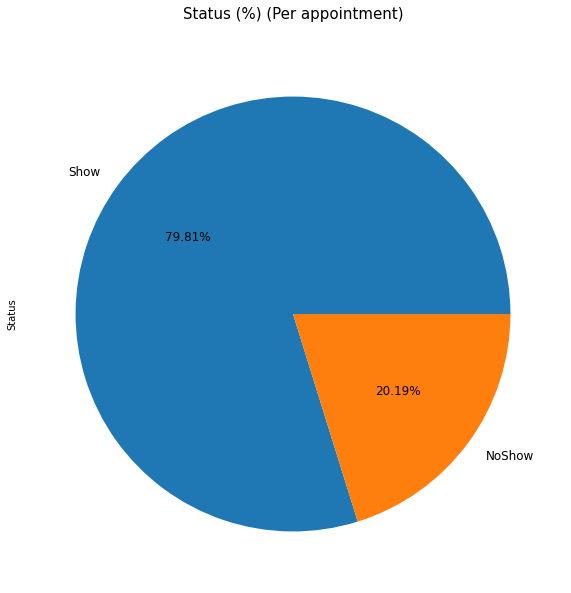

In [47]:
PropByVar(df, 'Status')

Female    65.0
Male      35.0
Name: Gender, dtype: float64

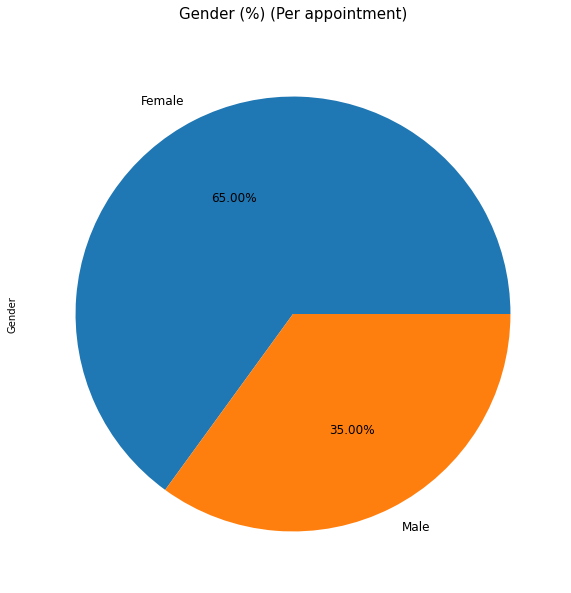

In [48]:
PropByVar(df, 'Gender')

Looking at the pie chart above, the overall show-up rate is **79.81%**.

**NOTE:** it is important to keep in mind that the pie chart above represents is calculated based on the number of appointments (not number of patients); in the next questions, we will include the number of patients in our calculations, as applicable.

## Research Question #2: What are the proportions of the different categories within each variable and the show-up rates broken down by category?
To answer this question, we will perform the following:

1. Calculate the category proportions (weights) within each variable (per appointment and per patient) and present the proportions (%) in a pie chart
2. Calculate the Show-up vs. No Show-up (%) for each category within each variable, plot the results in a bar chart and calculate the variance between the highest & lowest show-up rate.

### Q2.1: GENDER

Female    65.0
Male      35.0
Name: Gender, dtype: float64

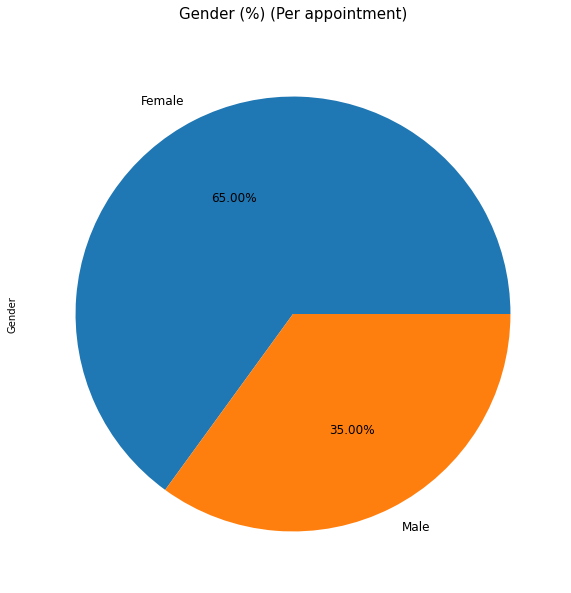

In [49]:
PropByVar(df, 'Gender')

Looking at the chart above, we find that the appointment proportion where patients are females is 65%, where the proportion of appointments where patients are males is **35%**.

,PatientID
Gender,
Female,64.28
Male,35.72


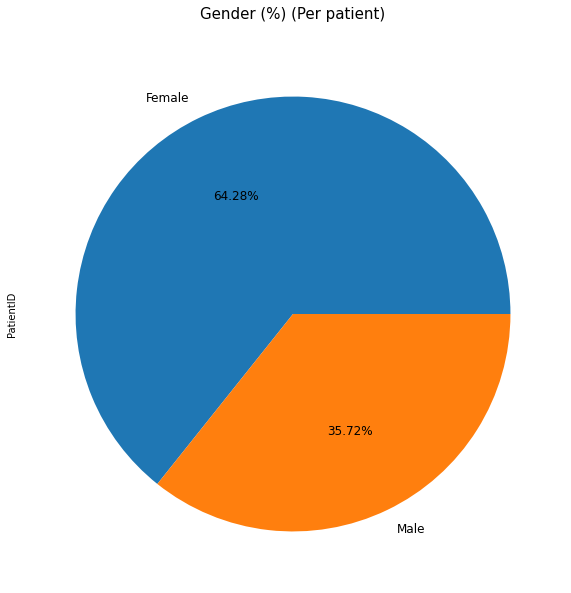

In [50]:
NumOfPatients(df, 'Gender')

Looking at the chart above, we find that **64.28%** of the patients are females and **35.72%** are males, which is close to the proportion of males and females (by appointment)

/var/folders/_h/67ytyncn46l3vcwj8pgsbb0w0000gn/T/ipykernel_73911/186851136.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);


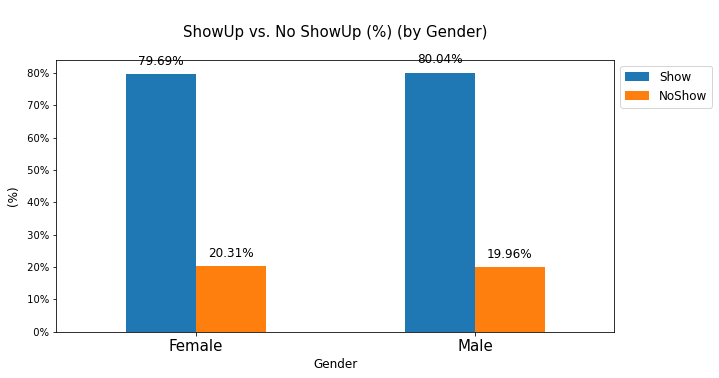

In [51]:
df_Gen = Show_No_Show_bar_plot(df, 'Gender')

In [52]:
RateVariance(df_Gen)

 Max ShowUp (%):  80.04 %
 Min ShowUp (%): 79.69 %
 Variance (%): 0.35 %


Based on the initial analysis above, we found that:

1. The proportion of appointments where patients are females is greater than the number of appointments where patients are males
2. The proportion of female patients is greater than the number of male patients.
3. The Show-up rate of male patients (per no. of appointments) is slightly greater than the show-up rate of female patients.

### Q2.2: Age Groups

0 - 19       27.51
40 - 59      27.21
20 - 39      26.12
60 - 79      16.11
80 - 99       3.03
100 - 119     0.01
Name: AgeGroup, dtype: float64

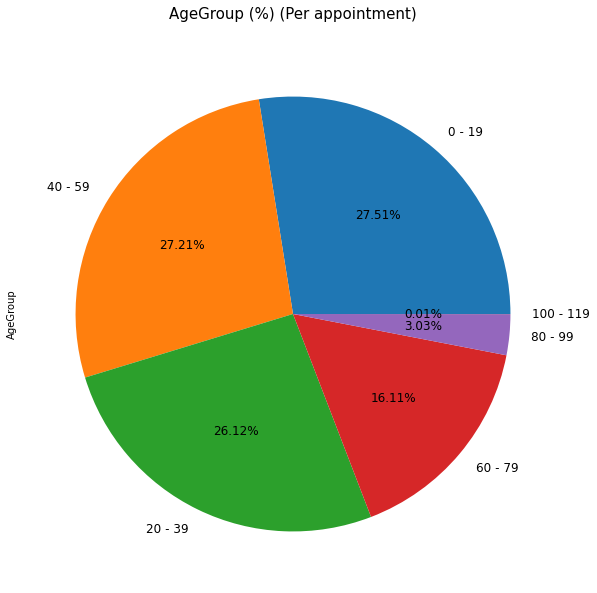

In [53]:
PropByVar(df, 'AgeGroup')

Looking at the chart above, we find that the appointment proportion where patients are from the age group (0-19) is the largest with 27.51%, where the proportion of appointments where patients are from the age group (100 - 119) is the smallest with 0.01%

,PatientID
AgeGroup,
0 - 19,28.89
20 - 39,25.30
40 - 59,26.25
60 - 79,16.40
80 - 99,3.16
100 - 119,0.01


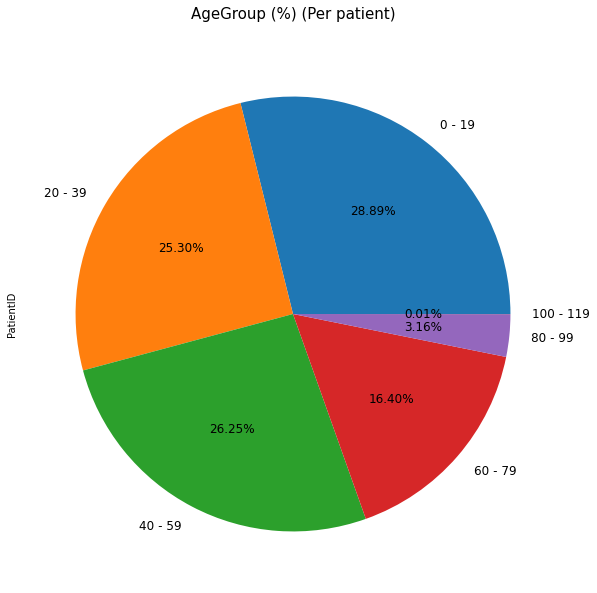

In [54]:
NumOfPatients(df, 'AgeGroup')

Looking at the chart above, we find that 28.89% of the patients are from the age group (0 - 19) where only 0.01% of the patients are from the age group (100 - 119). These proportions are very close the proportions we got when calculating the proportions (by appointments).

/var/folders/_h/67ytyncn46l3vcwj8pgsbb0w0000gn/T/ipykernel_73911/186851136.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);


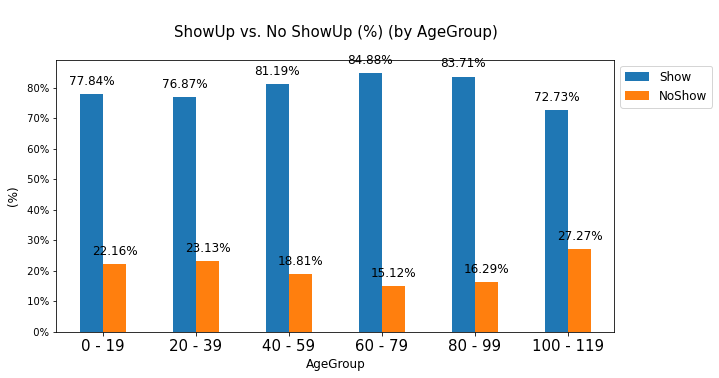

In [55]:
df_AgeGroup = Show_No_Show_bar_plot(df, 'AgeGroup')

In [56]:
RateVariance(df_AgeGroup)

 Max ShowUp (%):  84.88 %
 Min ShowUp (%): 72.73 %
 Variance (%): 12.15 %


Based on the initial analysis above, we found that:

1. The proportion of appointments where patients are from the age group (0 -19) is largest among the other age groups, where the age group (100 - 119) is the smallest with 0.01%
2. Same applies to the number of patients.
3. The Show-up rate of age group (60 - 79) (per no. of appointments) is the highest with 84.88% where the show-up rate of age group (100 - 119) is the lowest with 72.73%

### Q2.3: Neighbourhood
As mentioned before, we've limited the number of neighbourhood in our analysis to 20 (instead of 81) to include the top 20 neigbourhoods with the greatest number of appointments.

JARDIM CAMBURI       11.94
MARIA ORTIZ           8.98
RESISTÊNCIA           6.85
JARDIM DA PENHA       6.00
ITARARÉ               5.44
CENTRO                5.16
TABUAZEIRO            4.84
SANTA MARTHA          4.84
JESUS DE NAZARETH     4.41
BONFIM                4.29
SANTO ANTÔNIO         4.25
SANTO ANDRÉ           3.98
CARATOÍRA             3.97
JABOUR                3.88
SÃO PEDRO             3.79
ILHA DO PRÍNCIPE      3.51
NOVA PALESTINA        3.50
ANDORINHAS            3.50
DA PENHA              3.43
ROMÃO                 3.43
Name: Neighbourhood, dtype: float64

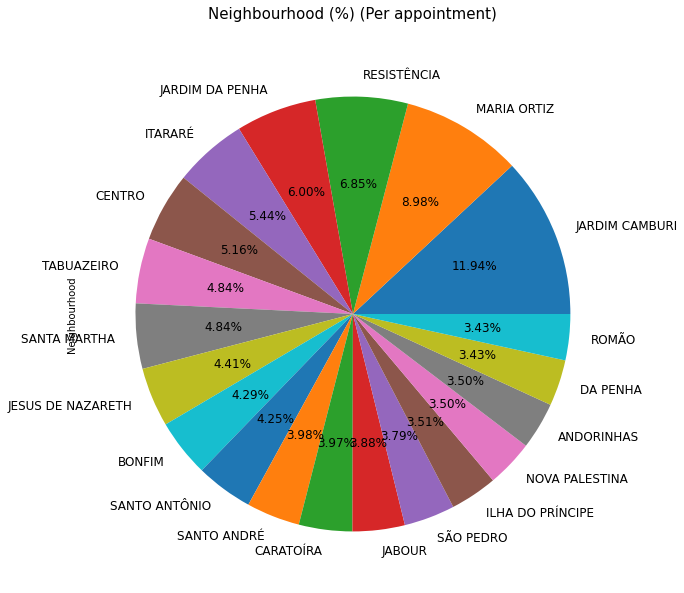

In [57]:
PropByVar(df_top_20_Nbrhd, 'Neighbourhood')

Looking at the chart above, we find that the appointment proportion where patients are based in JARDIM CAMBURI is the largest with 11.94%, where the proportion of appointments where patients are based in DA PENHA and ROMÃO is the smallest with 3.43%

,PatientID
Neighbourhood,
ANDORINHAS,3.12
BONFIM,4.45
CARATOÍRA,4.03
CENTRO,5.15
DA PENHA,3.62
ILHA DO PRÍNCIPE,3.03
ITARARÉ,5.89
JABOUR,3.95
JARDIM CAMBURI,11.56


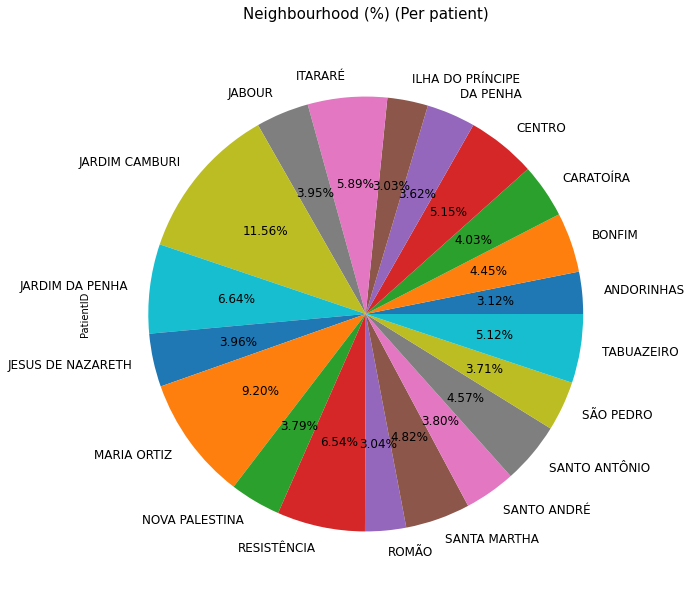

In [58]:
NumOfPatients(df_top_20_Nbrhd, 'Neighbourhood')

Looking at the chart above, we find that 11.56% of the patients are based in JARDIM CAMBURI, which is close to the proportion we got when calculating the proportions (by appointments).

/var/folders/_h/67ytyncn46l3vcwj8pgsbb0w0000gn/T/ipykernel_73911/1156042281.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);


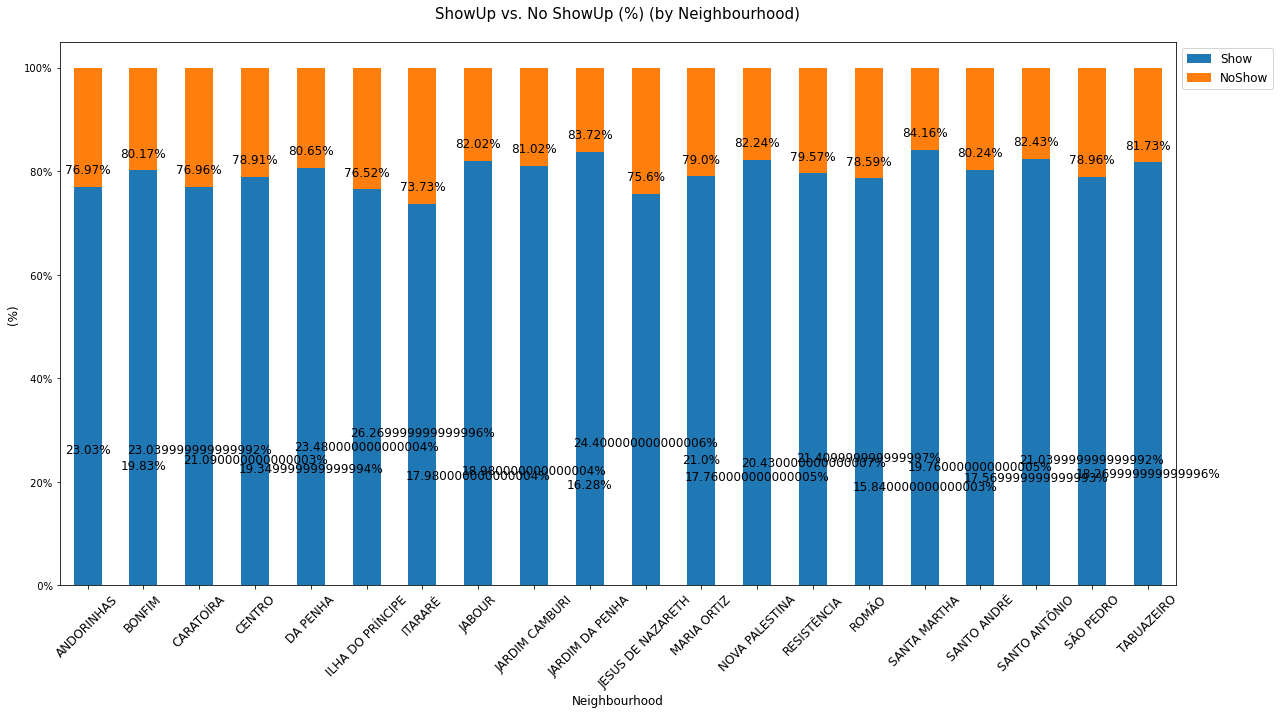

In [59]:
df_Nbrhd = Show_No_Show_bar_plot_V2(df_top_20_Nbrhd,'Neighbourhood')

In [60]:
RateVariance(df_Nbrhd)

 Max ShowUp (%):  84.16 %
 Min ShowUp (%): 73.73 %
 Variance (%): 10.43 %


Based on the initial analysis above, we found that:

1. The proportion of appointments where patients are based JARDIM CAMBURI is the largest among other neighbourhoods with 11.94%, where DA PENHA and ROMÃO is the smallest with 0.01%
2. Same applies to the number of patients.
3. The Show-up rate of SANTA MARTHA (per no. of appointments) is the highest with 84.16%, where the show-up rate of ITARARÉ is the lowest with 73.73%

### Q2.4: Scholarship

No Scholarship    90.17
Scholarship        9.83
Name: Scholarship, dtype: float64

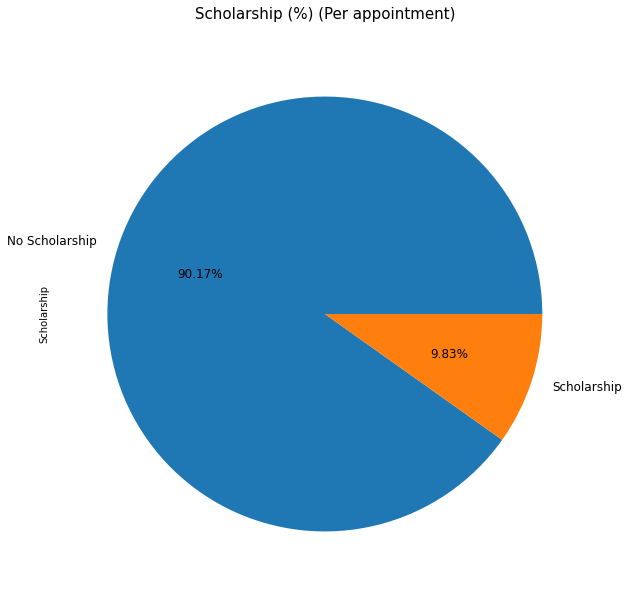

In [61]:
PropByVar(df, 'Scholarship')

Looking at the chart above, we find that the appointment proportion where patients don't have a scholarship is 90.17%, where the proportion of appointments where patients have been granted a scholarship is 9.83%.

,PatientID
Scholarship,
No Scholarship,90.71
Scholarship,9.29


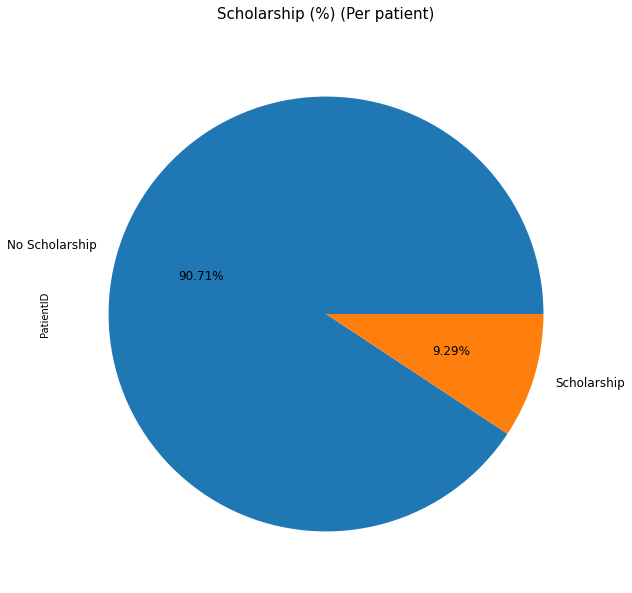

In [62]:
NumOfPatients(df, 'Scholarship')

Looking at the chart above, we find that 90.71% of the patients don't have a scholarship, where only 9.29% of the patients have been granted a scholarship.

/var/folders/_h/67ytyncn46l3vcwj8pgsbb0w0000gn/T/ipykernel_73911/186851136.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);


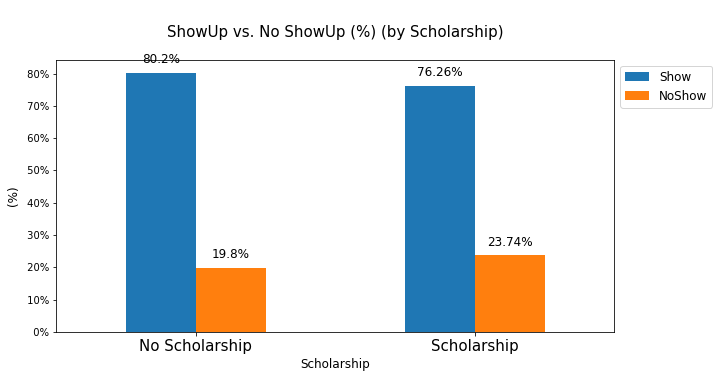

In [63]:
df_Sclrshp = Show_No_Show_bar_plot(df, 'Scholarship')

Looking at the chart above, we notice that the appointments that belongs to patients with no scholarship (90.17% of the total population) have the highest show-up rate of **80.2%** (higher than the average show-up rate), where those with scholarships (9.83% of the total population) have a show-up rate of 76.26% (lower than the average show-up rate).

The variance between the highest rate and the lowest rate is: 3.94%

In [64]:
RateVariance(df_Sclrshp)

 Max ShowUp (%):  80.2 %
 Min ShowUp (%): 76.26 %
 Variance (%): 3.94 %


Based on the initial analysis above, we found that:

1. The proportion of appointments where patients don't have a scholarship is the largest with 90.17%
2. The proportion of patients who don't have a scholarship is the largest with 90.71%
3. The Show-up rate of patients who don't have a scholarship is the highest with 80.2%, where the show-up rate of patients who have a scholarship is 76.26%


### Q2.5: Hypertension

No Hypertension    80.27
Hypertension       19.73
Name: Hypertension, dtype: float64

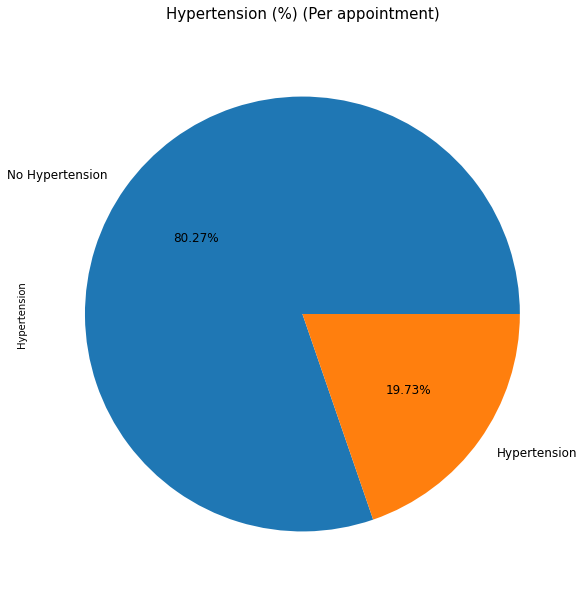

In [65]:
PropByVar(df, 'Hypertension')

Looking at the chart above, we find that the appointment proportion where patients have no hypertension is 80.27%, where the proportion of appointments where patients have hypertension is 19.73%.

,PatientID
Hypertension,
No Hypertension,80.35
Hypertension,19.65


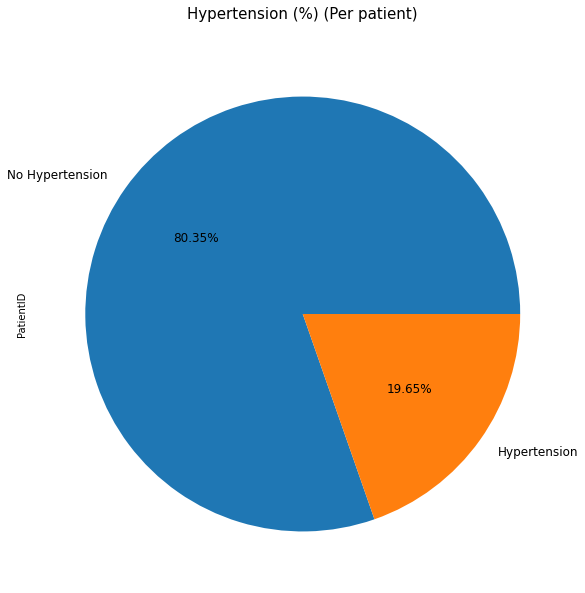

In [66]:
NumOfPatients(df, 'Hypertension')

Looking at the chart above, we find that 80.35% of the patients don't have hypertension, which is close to the proportion we got when calculating the proportions (by appointments).

/var/folders/_h/67ytyncn46l3vcwj8pgsbb0w0000gn/T/ipykernel_73911/186851136.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);


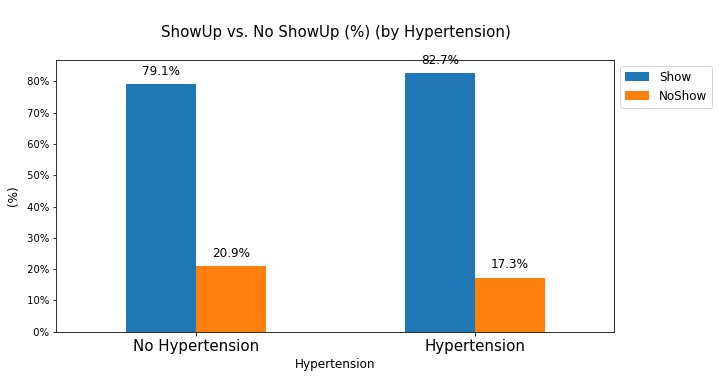

In [67]:
df_Hprtn = Show_No_Show_bar_plot(df, 'Hypertension')


In [68]:
RateVariance(df_Hprtn)

 Max ShowUp (%):  82.7 %
 Min ShowUp (%): 79.1 %
 Variance (%): 3.6 %


Based on the initial analysis above, we found that:

1. The proportion of appointments where patients don't have hypertension is the largest with 80.27%
2. The proportion of patients who don't have hypertension is the largest with 80.35%
3. The Show-up rate of patients who have hypertension is the highest with 82.7%, where the show-up rate of patients who dont'have hypertension is 79.1%


### Q2.6: Diabetes

No Diabetes    92.81
Diabetes        7.19
Name: Diabetes, dtype: float64

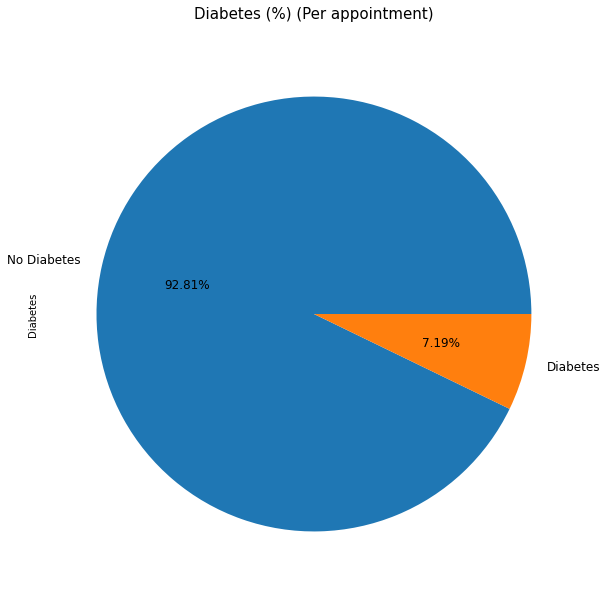

In [69]:
PropByVar(df, 'Diabetes')

Looking at the chart above, we find that the appointment proportion where patients don't have diabetes is 92.81%, where the proportion of appointments where patients have diabetes is 7.19%.

,PatientID
Diabetes,
No Diabetes,92.91
Diabetes,7.09


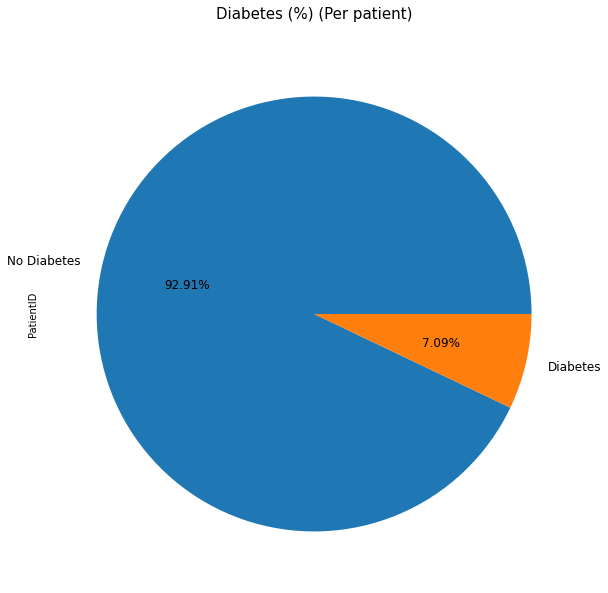

In [70]:
NumOfPatients(df, 'Diabetes')

Looking at the chart above, we find that 92.91% of the patients don't have diabetes, which is very close to the proportion we got when calculating the proportions (by appointments).

/var/folders/_h/67ytyncn46l3vcwj8pgsbb0w0000gn/T/ipykernel_73911/186851136.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);


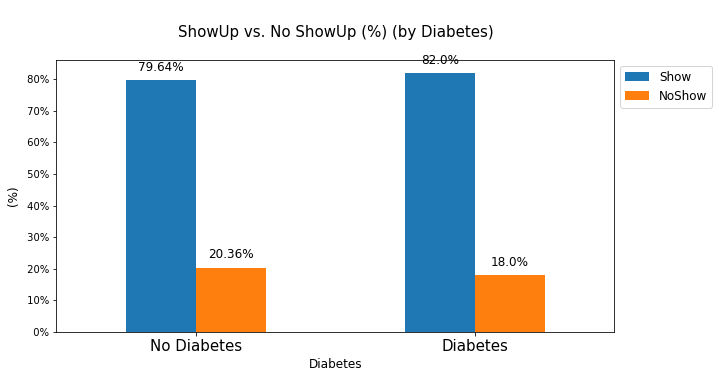

In [71]:
df_Dbt = Show_No_Show_bar_plot(df, 'Diabetes')

In [72]:
RateVariance(df_Dbt)

 Max ShowUp (%):  82.0 %
 Min ShowUp (%): 79.64 %
 Variance (%): 2.36 %


Based on the initial analysis above, we found that:

1. The proportion of appointments where patients don't have diabetes is the largest with 92.81%
2. The proportion of patients who don't have diabetes is the largest with 92.91%
3. The Show-up rate of patients who have diabetes is the highest with 82%, where the show-up rate of patients who don't have diabetes is 79.64%


No Alcoholism    96.96
Alcoholism        3.04
Name: Alcoholism, dtype: float64

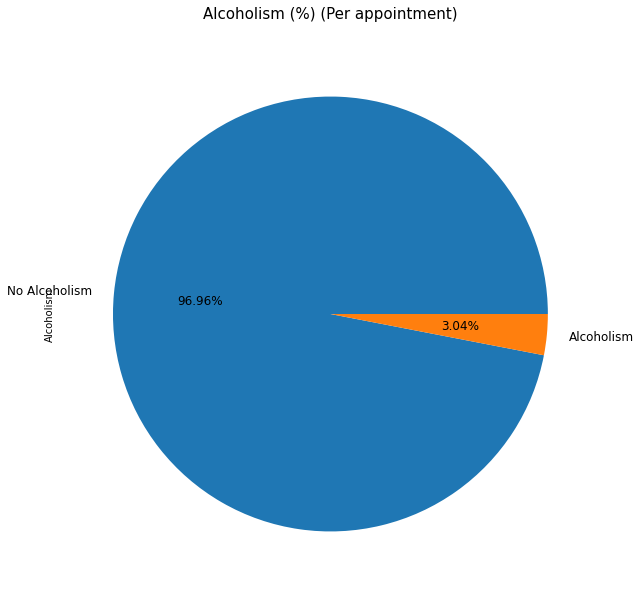

In [73]:
PropByVar(df, 'Alcoholism')

Looking at the chart above, we find that the appointment proportion where patients have no alcoholism is 96.96%, where the proportion of appointments where patients have alcoholism is 3.04%.

,PatientID
Alcoholism,
No Alcoholism,97.58
Alcoholism,2.42


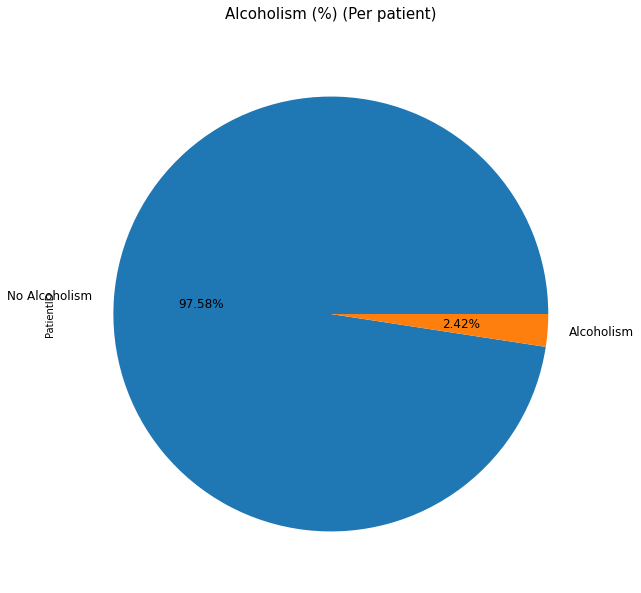

In [74]:
NumOfPatients(df, 'Alcoholism')

Looking at the chart above, we find that 97.58% of the patients don't have alcoholism, which is close to the proportion we got when calculating the proportions (by appointments).

/var/folders/_h/67ytyncn46l3vcwj8pgsbb0w0000gn/T/ipykernel_73911/186851136.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);


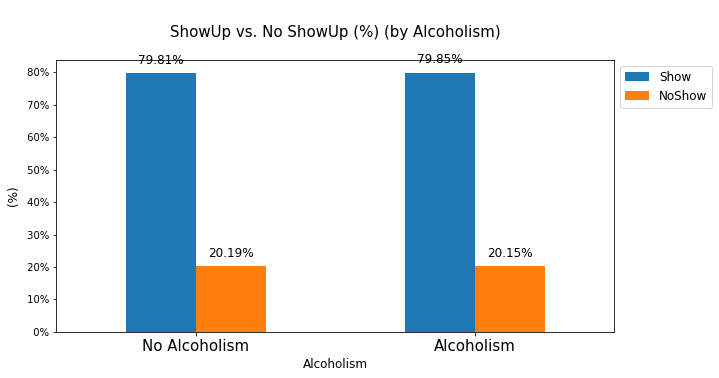

In [75]:
df_Alchl = Show_No_Show_bar_plot(df, 'Alcoholism')

Looking at the chart above, we notice that patients who experiance Alcoholism (3.04% of the total population) have the highest show-up rate of 79.85% (higher than the average show-up rate), where patients who don't experiance Alcohol (96.96 % of the total population) have a show-up rate of 79.81% (equal to the average show-up rate).

The variance between the highest rate and the lowest rate is: 0.04%

In [76]:
RateVariance(df_Alchl)

 Max ShowUp (%):  79.85 %
 Min ShowUp (%): 79.81 %
 Variance (%): 0.04 %


Based on the initial analysis above, we found that:

1. The proportion of appointments where patients don't have alcoholism is the largest with 96.96%
2. The proportion of patients who don't have alcoholism is the largest with 97.58%
3. The Show-up rate of patients who have alcoholism is the highest with 79.85%, where the show-up rate of patients who don't have alcoholism is 79.81%

### Conclusions
As mentioned above, this analysis is not meant to be providing a final conclusion on the reasons leading to patients missing their appointments as it doesn't involve using any inferential statistics techniques/machine learning algorithms; the scope of this project has been customized to meet specific objectives; and the project will be revisited as we progress in the course and utilize more advanced data analysis techniques/algorithms.

Limitations & Assumptions:

1. Most of the calculations performed in this project are based on the number of apppointments not patients. The calculations where number of patients is referenced are explicitly highlighted.
2. We were not able to address the time dimenion as the appointments times were set to 00:00:00
3. As we were not able to obtain sufficient explanation on specific cases where data was not consistent, we've excluded 6 data entries from the original dataset. original size 110527; new size: 110521
4. As most of the columns represent categorical data, and given the type of questions/analysis selected, the visualization charts were mainly (stacked) bar charts, pie charts; Histograms and other quantitative-related charts such as scatter diagrams, were excluded from this project to the same reason above.

* Questions*

Our work aimed at answering the following questions:

1. What is the overall appointment show-up vs. no show-up rate?
2. What are the proportions of the different categories within each variable and the show-up rates broken down by category?
3. Given the appointments where patients didn't show up, what is percentage of recurring patients vs. new patients? (the term recurring patients will be defined in the coming sections)
4. For each pair of variables, calculate the proportions of category combinations to identify the largest group of patients who didn't show-up. A step-by-step process will be provided to explain how this step will be performed. The purpose of this analysis is to serve as a starting point to identifying the factors that they may be contributing to the patients missing their appointments.
Preliminary Findings:

*A. Proportions*

A1. The overall show-up rate is: 79.81%

A2. The (%) of female patients is greater than male patients (64.28% vs 35.72%)

A3. The largest Age group is (0 - 19) years old with 28.89% where the smallest is (100 - 119) years old with 0.01%

A4. The neighbourhood with the largest (%) of appointments is JARDIM CAMURI with 11.94%; where the neighbourhood with the largest number of patients is ANDORINHAS with 3.12% of the total number of patients (based on the top-20 neighbourhood list)

A5. The (%) of patients who have a scholarship is 9.29%

A6. The (%) of patients who experiance hypertension is 19.65%

A7. The (%) of patients who experiance diabetes is 7.09%

A8. The (%) of patients who experiance alcoholism is 2.42%

A9. 1.65% of the patients experiance handicap L1 condition, 0.16% experiance L2 condition, and 0.01% experiance L3 condition.

A10. The (%) of patients who received an SMS reminder is 36.41%

A11. The DayOfWeek with the largest number of appointments was Wednesday with 23.40%, where the day with the smallest number of appointments was Saturday with 0.04%

A12. The greatest proportion of appointments (89.97%) had a waiting duration between (0 - 29) days.

*B. Show-up rates (per no. of appointments) - Single Variable*:

B1. The (%) of patients who failed to show up to more than one of their appointments is 20.85%

B2. The Show-up rate of male patients is slightly greater than the show-up rate of female patients. (80.04% vs. 79.69%)

B3. The Show-up rate of age group (60 - 79) is the highest with 84.88% where the show-up rate of age group (100 - 119) is the lowest with 72.73%

B4. The Show-up rate of SANTA MARTHA is the highest with 84.16%, where the show-up rate of ITARARÉ is the lowest with 73.73%

B5. The Show-up rate of patients who don't have a scholarship is the highest with 80.2%, where the show-up rate of patients who have a scholarship is 76.26%

B6. The Show-up rate of patients who have hypertension is the highest with 82.7%, where the show-up rate of patients who dont'have hypertension is 79.1%

B7. The Show-up rate of patients who have diabetes is the highest with 82%, where the show-up rate of patients who don't have diabetes is 79.64%

B8. The Show-up rate of patients who have alcoholism is the highest with 79.85%, where the show-up rate of patients who don't have alcoholism is 79.81%

In [79]:
!jupyter-notebook nbconvert Investigate-a-dataset.ipynb --to slides --post serve --no-input --no-prompt

zsh:1: command not found: jupyter-notebook
